In [1]:
import time
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
def cut_value(graph, labels):
    total = 0
    for u, v, data in graph.edges(data=True):
        if labels[u] != labels[v]:
            total += data.get("weight", 1)
    return total


In [3]:
def greedy_max_k_cut_basic(graph: nx.Graph, k: int):
    labels = {}
    for node in graph.nodes():
        best_group = 0
        best_value = float("-inf")   
        for group in range(k):
            value = 0.0              
            for neighbor, data in graph[node].items():
                w = data.get("weight", 1)
                if neighbor in labels and labels[neighbor] != group:
                    value += w
            if value > best_value:
                best_value = value
                best_group = group
        labels[node] = best_group
    return labels, cut_value(graph, labels)


In [4]:
def greedy_max_k_cut_sorted(graph: nx.Graph, k: int):
    labels = {}
    sorted_nodes = sorted(graph.nodes(), key=lambda node: graph.degree(node), reverse=True)
    for node in sorted_nodes:
        best_group = 0
        best_value = float("-inf")   
        for group in range(k):
            value = 0.0              
            for neighbor, data in graph[node].items():
                w = data.get("weight", 1)
                if neighbor in labels and labels[neighbor] != group:
                    value += w
            if value > best_value:
                best_value = value
                best_group = group
        labels[node] = best_group
    return labels, cut_value(graph, labels)

In [5]:
def format_time(seconds):
    return "{:.10f}".format(seconds)

In [6]:
def appendToFile(filename, k, best_val, elapsed_time):
    podaci.append(filename + ".txt")
    podaci.append("k: " + str(k))
    podaci.append("Best cut value: " + str(best_val))
    podaci.append("Vreme: " + format_time(elapsed_time) + " sekundi")

    with open("../Rezultati/brute_force_maxkcut.txt", "a") as fajl:
        for podatak in podaci:
            fajl.write(f"{podatak}\n")

    podaci.clear()

In [7]:
def plot_graph(graph, colors):
   
    G = nx.Graph(graph)
    node_colors = []
    for node in G.nodes():
        try:
            node_colors.append(colors[node])
        except KeyError:
            print("Čvor", node, "nema dodeljenu grupu.")
            node_colors.append('gray')  # nedodeljeni čvorovi sivi

    nx.draw(G, with_labels=True,
            node_color=node_colors,
            cmap=plt.cm.rainbow,
            node_size=500)
    
    plt.show()

In [8]:
podaci = []

graph1 = {
    'A': ['B','C','D'],
    'B': ['A','C'],
    'C': ['A','B','D'],
    'D': ['A','C','E'],
    'E': ['D','F'],
    'F': ['E','G'],
    'G': ['F']
}
G1 = nx.Graph(graph1)
for u, v in G1.edges():
    G1.edges[u, v]['weight'] = 1

=== PRIMER 1 — Greedy (basic) ===
Najbolja vrednost preseka: 8
Podela čvorova: {'A': 0, 'B': 1, 'C': 2, 'D': 1, 'E': 0, 'F': 1, 'G': 0}
Vreme: 0.0002765656 sekundi


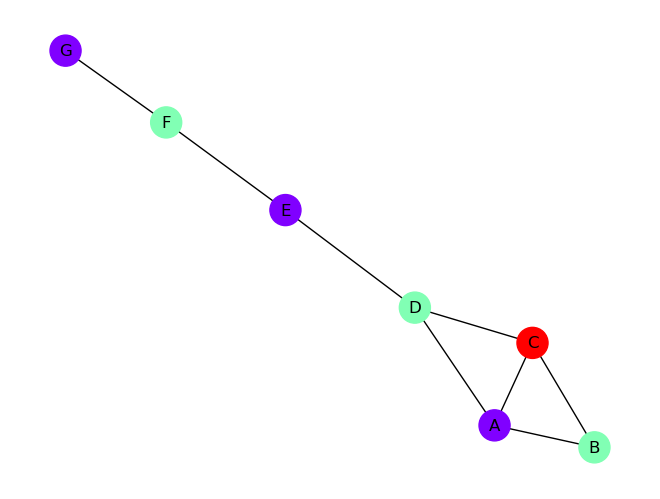


=== PRIMER 1 — Greedy (sorted) ===
Najbolja vrednost preseka: 8
Podela čvorova: {'A': 0, 'C': 1, 'D': 2, 'B': 2, 'E': 0, 'F': 1, 'G': 0}
Vreme: 0.0001859665 sekundi


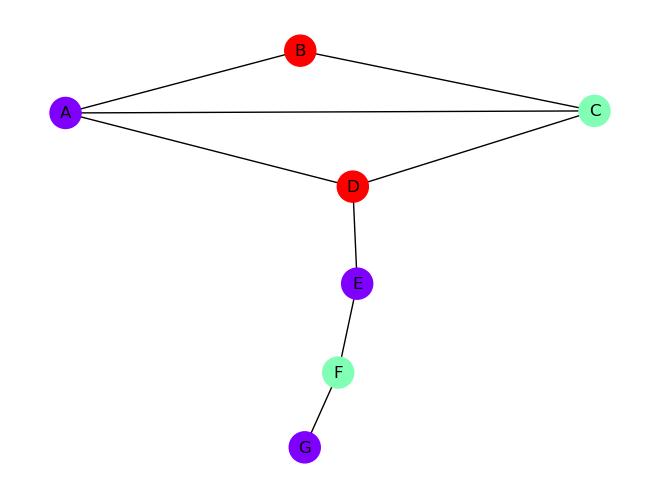

In [10]:
k = 3

print("=== PRIMER 1 — Greedy (basic) ===")
start_time = time.time()
labels_basic, best_val_basic = greedy_max_k_cut_basic(G1, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_basic)
print("Podela čvorova:", labels_basic)
print("Vreme:", format_time(end_time - start_time), "sekundi")


plot_graph(G1, labels_basic)

print("\n=== PRIMER 1 — Greedy (sorted) ===")
start_time = time.time()
labels_sorted, best_val_sorted = greedy_max_k_cut_sorted(G1, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_sorted)
print("Podela čvorova:", labels_sorted)
print("Vreme:", format_time(end_time - start_time), "sekundi")


plot_graph(G1, labels_sorted)

In [11]:
G2 = nx.Graph()
G2.add_edge('A','B', weight=3)
G2.add_edge('A','C', weight=2)
G2.add_edge('B','C', weight=5)
G2.add_edge('C','D', weight=4)
G2.add_edge('B','D', weight=1)

=== PRIMER 2 — Greedy (basic) ===
Najbolja vrednost preseka: 15
Podela čvorova: {'A': 0, 'B': 1, 'C': 2, 'D': 0}
Vreme: 0.0002534389 sekundi


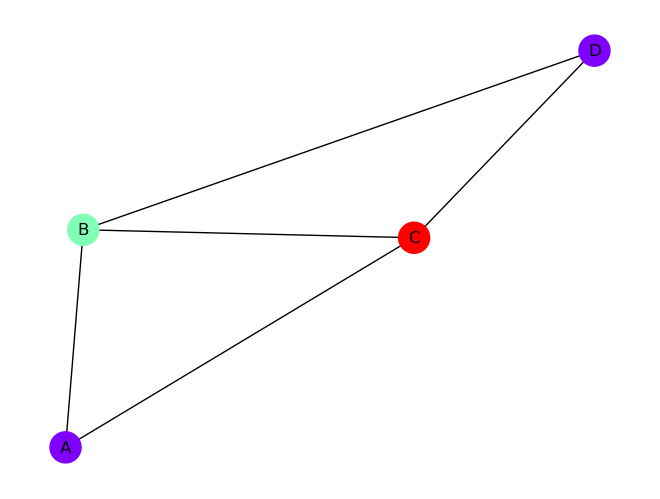


=== PRIMER 2 — Greedy (sorted) ===
Najbolja vrednost preseka: 15
Podela čvorova: {'B': 0, 'C': 1, 'A': 2, 'D': 2}
Vreme: 0.0002272129 sekundi


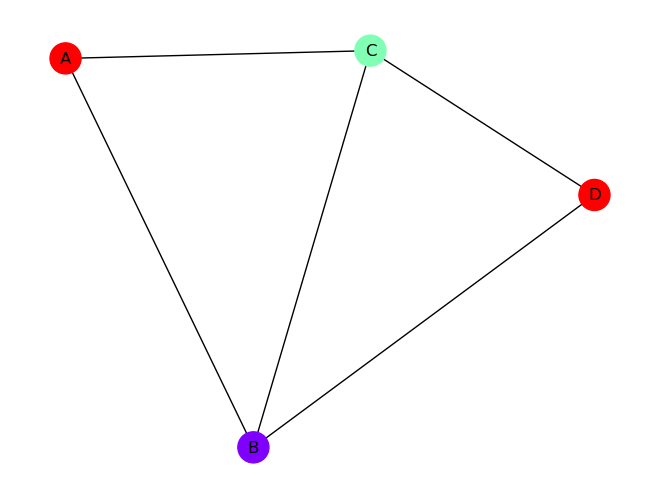

In [13]:

k = 3

print("=== PRIMER 2 — Greedy (basic) ===")
start_time = time.time()
labels_basic, best_val_basic = greedy_max_k_cut_basic(G2, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_basic)
print("Podela čvorova:", labels_basic)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G2, labels_basic)

print("\n=== PRIMER 2 — Greedy (sorted) ===")
start_time = time.time()
labels_sorted, best_val_sorted = greedy_max_k_cut_sorted(G2, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_sorted)
print("Podela čvorova:", labels_sorted)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G2, labels_sorted)


In [50]:
n = 30  
filename = f"testiranje/graph_{n}.edgelist"
G3 = nx.read_weighted_edgelist(filename, nodetype=int)

=== PRIMER 3 — Greedy (basic) ===
Najbolja vrednost preseka: 492.0
Podela čvorova: {0: 0, 3: 1, 14: 2, 15: 1, 22: 1, 23: 2, 1: 0, 9: 1, 17: 1, 4: 0, 6: 0, 12: 0, 20: 2, 26: 2, 29: 0, 16: 1, 27: 1, 28: 1, 5: 2, 19: 0, 24: 2, 25: 1, 11: 1, 13: 2, 18: 0, 7: 0, 8: 0, 21: 2, 10: 1}
Vreme: 0.0008280277 sekundi


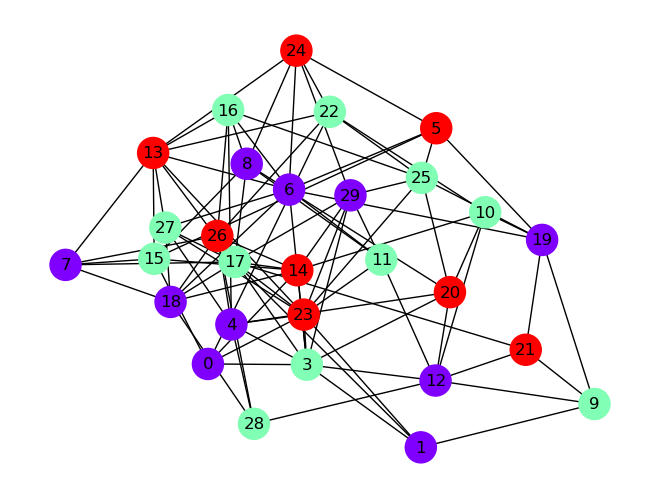


=== PRIMER 3 — Greedy (sorted) ===
Najbolja vrednost preseka: 491.0
Podela čvorova: {17: 0, 3: 0, 23: 1, 6: 1, 26: 1, 13: 2, 14: 2, 4: 2, 12: 1, 29: 0, 25: 2, 18: 0, 15: 0, 22: 0, 20: 0, 16: 0, 27: 0, 19: 0, 24: 2, 8: 1, 0: 2, 5: 2, 11: 2, 7: 2, 10: 1, 1: 2, 9: 1, 28: 0, 21: 2}
Vreme: 0.0006093979 sekundi


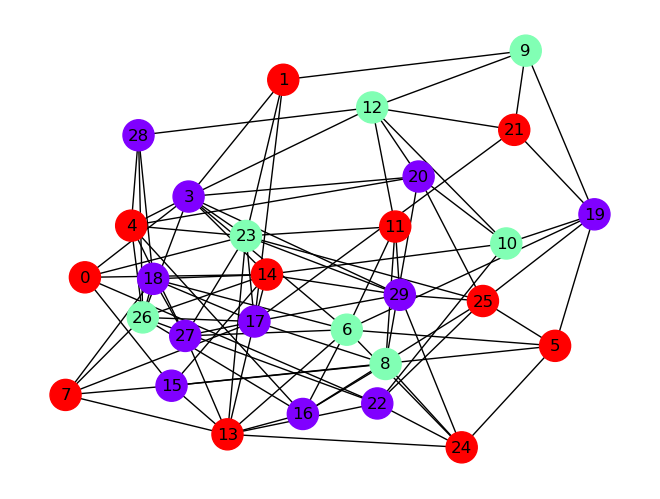

In [51]:
print("=== PRIMER 3 — Greedy (basic) ===")
start_time = time.time()
labels_basic, best_val_basic = greedy_max_k_cut_basic(G3, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_basic)
print("Podela čvorova:", labels_basic)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G3, labels_basic)

print("\n=== PRIMER 3 — Greedy (sorted) ===")
start_time = time.time()
labels_sorted, best_val_sorted = greedy_max_k_cut_sorted(G3, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_sorted)
print("Podela čvorova:", labels_sorted)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G3, labels_sorted)


In [52]:
n = 50  
filename = f"testiranje/graph_{n}.edgelist"
G4 = nx.read_weighted_edgelist(filename, nodetype=int)

=== PRIMER 4 — Greedy (basic) ===
Najbolja vrednost preseka: 1097.0
Podela čvorova: {0: 0, 7: 1, 10: 1, 11: 1, 15: 1, 32: 2, 1: 0, 3: 2, 6: 1, 9: 1, 19: 2, 20: 1, 23: 2, 26: 1, 37: 1, 40: 2, 49: 2, 2: 0, 4: 0, 5: 1, 16: 2, 21: 1, 30: 0, 31: 2, 36: 1, 38: 1, 8: 0, 22: 0, 25: 0, 35: 0, 39: 0, 47: 1, 41: 2, 12: 0, 46: 0, 14: 0, 17: 1, 28: 0, 29: 2, 42: 0, 34: 2, 44: 1, 48: 2, 13: 0, 24: 2, 27: 2, 33: 0, 18: 1, 45: 0, 43: 0}
Vreme: 0.0014021397 sekundi


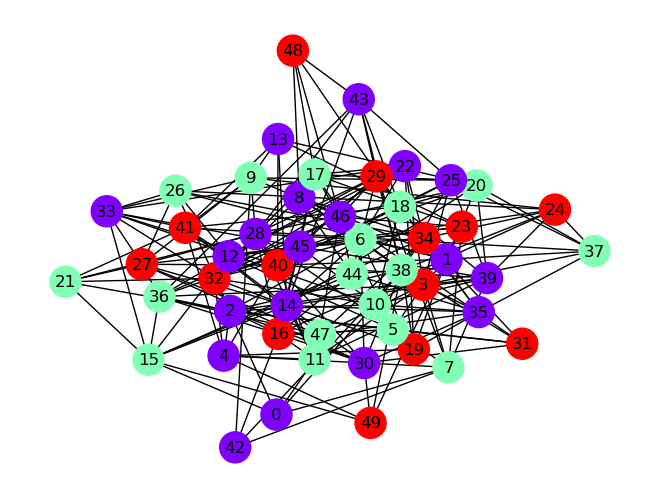


=== PRIMER 4 — Greedy (sorted) ===
Najbolja vrednost preseka: 1085.0
Podela čvorova: {3: 0, 38: 1, 32: 0, 40: 0, 14: 1, 28: 1, 6: 2, 2: 2, 16: 0, 29: 2, 1: 1, 39: 2, 46: 1, 34: 0, 27: 2, 10: 0, 30: 1, 36: 1, 25: 2, 35: 2, 41: 0, 17: 0, 33: 1, 18: 1, 45: 1, 11: 2, 15: 2, 9: 0, 12: 1, 7: 0, 19: 0, 20: 0, 4: 1, 8: 2, 22: 1, 24: 0, 43: 0, 23: 1, 26: 0, 37: 1, 5: 2, 47: 1, 44: 0, 21: 1, 31: 0, 13: 2, 0: 1, 49: 0, 48: 2, 42: 2}
Vreme: 0.0008709431 sekundi


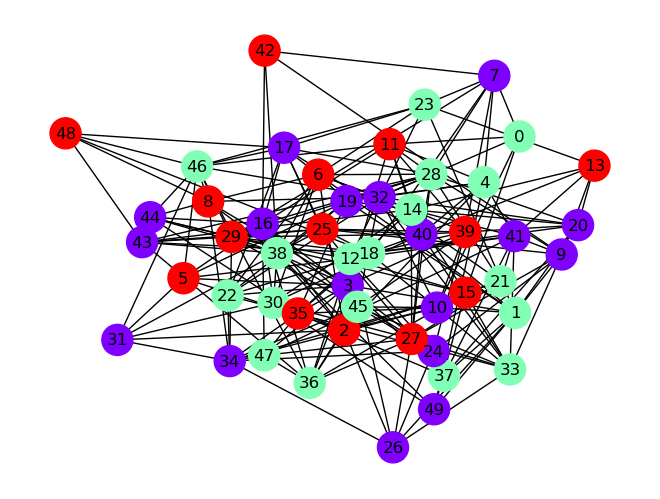

In [53]:
print("=== PRIMER 4 — Greedy (basic) ===")
start_time = time.time()
labels_basic, best_val_basic = greedy_max_k_cut_basic(G4, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_basic)
print("Podela čvorova:", labels_basic)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G4, labels_basic)

print("\n=== PRIMER 4 — Greedy (sorted) ===")
start_time = time.time()
labels_sorted, best_val_sorted = greedy_max_k_cut_sorted(G4, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_sorted)
print("Podela čvorova:", labels_sorted)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G4, labels_sorted)

In [54]:
n = 100
filename = f"testiranje/graph_{n}.edgelist"
G5 = nx.read_weighted_edgelist(filename, nodetype=int)

=== PRIMER 5 — Greedy (basic) ===
Najbolja vrednost preseka: 4295.0
Podela čvorova: {0: 0, 1: 1, 9: 1, 11: 2, 18: 0, 19: 1, 28: 1, 30: 2, 31: 1, 35: 1, 42: 1, 68: 1, 71: 2, 74: 2, 75: 1, 84: 0, 85: 0, 86: 2, 99: 2, 4: 0, 5: 0, 7: 0, 8: 0, 10: 0, 21: 2, 40: 0, 41: 0, 51: 2, 53: 2, 57: 1, 59: 2, 63: 2, 67: 0, 73: 1, 76: 2, 88: 0, 89: 2, 90: 0, 91: 0, 93: 2, 96: 1, 2: 1, 22: 0, 24: 2, 32: 2, 37: 2, 44: 0, 50: 0, 64: 0, 66: 0, 69: 2, 72: 0, 77: 1, 87: 0, 97: 0, 3: 1, 23: 0, 25: 1, 26: 0, 45: 0, 60: 2, 83: 2, 14: 1, 29: 2, 34: 1, 62: 2, 95: 1, 33: 1, 36: 2, 49: 2, 52: 2, 56: 0, 82: 1, 92: 2, 6: 2, 54: 1, 70: 2, 79: 0, 15: 1, 39: 1, 58: 1, 61: 0, 38: 1, 46: 1, 65: 2, 78: 1, 16: 0, 81: 0, 17: 1, 27: 1, 94: 2, 55: 2, 12: 0, 13: 1, 43: 0, 47: 0, 80: 1, 20: 2, 98: 1, 48: 0}
Vreme: 0.0066366196 sekundi


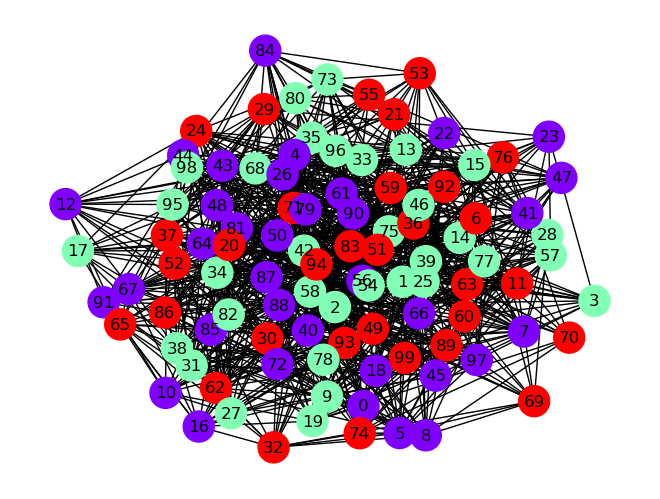


=== PRIMER 5 — Greedy (sorted) ===
Najbolja vrednost preseka: 4348.0
Podela čvorova: {1: 0, 26: 0, 51: 1, 2: 0, 79: 0, 71: 0, 88: 2, 90: 2, 93: 1, 94: 1, 59: 1, 50: 2, 83: 1, 35: 0, 25: 2, 14: 0, 15: 2, 78: 2, 42: 0, 64: 1, 77: 0, 87: 1, 62: 0, 49: 1, 54: 1, 9: 2, 7: 2, 96: 2, 97: 1, 60: 1, 56: 2, 58: 0, 11: 2, 18: 1, 30: 0, 68: 0, 99: 1, 5: 2, 8: 1, 76: 2, 72: 2, 95: 1, 82: 0, 6: 2, 61: 0, 43: 2, 20: 0, 98: 2, 31: 2, 40: 0, 24: 1, 37: 2, 66: 0, 29: 1, 34: 1, 36: 1, 39: 1, 0: 1, 75: 1, 84: 2, 85: 2, 86: 1, 57: 0, 73: 0, 45: 2, 33: 2, 52: 1, 81: 0, 19: 2, 74: 0, 41: 0, 89: 1, 38: 0, 46: 2, 28: 0, 4: 2, 21: 1, 91: 1, 22: 1, 92: 0, 27: 1, 12: 2, 13: 2, 53: 1, 63: 1, 67: 2, 32: 0, 65: 0, 16: 2, 55: 1, 47: 2, 48: 0, 44: 0, 80: 0, 10: 0, 69: 0, 3: 0, 17: 0, 23: 0, 70: 0}
Vreme: 0.0023653507 sekundi


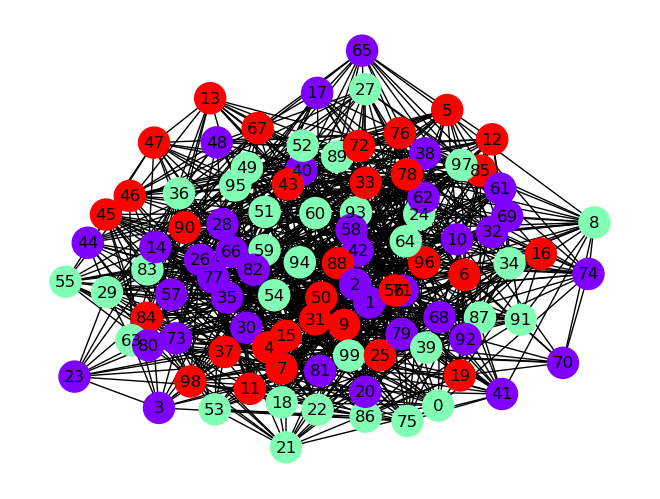

In [55]:
print("=== PRIMER 5 — Greedy (basic) ===")
start_time = time.time()
labels_basic, best_val_basic = greedy_max_k_cut_basic(G5, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_basic)
print("Podela čvorova:", labels_basic)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G5, labels_basic)

print("\n=== PRIMER 5 — Greedy (sorted) ===")
start_time = time.time()
labels_sorted, best_val_sorted = greedy_max_k_cut_sorted(G5, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_sorted)
print("Podela čvorova:", labels_sorted)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G5, labels_sorted)

In [56]:
n =200 
filename = f"testiranje/graph_{n}.edgelist"
G6 = nx.read_weighted_edgelist(filename, nodetype=int)

=== PRIMER 6 — Greedy (basic) ===
Najbolja vrednost preseka: 16996.0
Podela čvorova: {0: 0, 1: 1, 4: 2, 7: 1, 9: 1, 10: 1, 13: 1, 18: 2, 23: 1, 24: 2, 25: 1, 30: 1, 35: 2, 47: 1, 57: 0, 61: 0, 63: 0, 69: 2, 70: 2, 77: 2, 80: 2, 84: 0, 85: 2, 89: 1, 90: 2, 91: 0, 92: 1, 95: 0, 100: 0, 102: 0, 105: 0, 106: 2, 109: 1, 111: 2, 113: 2, 114: 1, 126: 1, 129: 2, 135: 2, 136: 1, 140: 2, 141: 0, 144: 0, 148: 2, 151: 1, 158: 2, 161: 1, 173: 2, 180: 0, 181: 2, 188: 0, 27: 2, 28: 0, 31: 2, 34: 1, 37: 1, 38: 0, 39: 0, 54: 0, 55: 0, 64: 1, 66: 0, 67: 2, 72: 2, 75: 0, 79: 2, 96: 0, 99: 2, 103: 0, 107: 0, 115: 0, 118: 2, 128: 2, 132: 1, 143: 0, 147: 1, 162: 1, 166: 1, 169: 2, 172: 2, 176: 0, 177: 1, 182: 2, 183: 2, 184: 0, 194: 0, 195: 1, 199: 2, 2: 1, 16: 0, 17: 1, 20: 1, 40: 0, 44: 2, 53: 0, 76: 0, 82: 0, 97: 2, 98: 2, 108: 1, 119: 1, 131: 0, 145: 1, 150: 0, 152: 2, 153: 0, 159: 1, 163: 1, 178: 1, 187: 1, 3: 2, 19: 0, 21: 1, 32: 1, 36: 1, 58: 1, 68: 0, 94: 2, 122: 1, 123: 1, 125: 0, 149: 0, 155: 2, 1

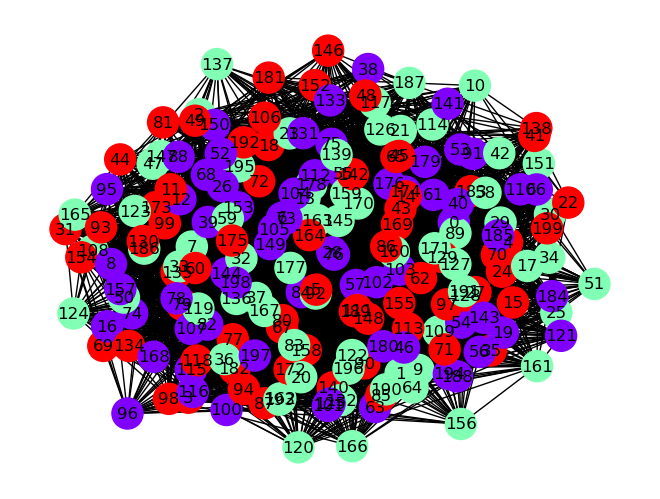


=== PRIMER 6 — Greedy (sorted) ===
Najbolja vrednost preseka: 16877.0
Podela čvorova: {111: 0, 28: 1, 92: 0, 14: 0, 73: 1, 103: 2, 109: 1, 37: 2, 159: 0, 0: 2, 32: 0, 142: 2, 23: 0, 57: 0, 89: 1, 102: 0, 106: 1, 188: 1, 177: 2, 167: 1, 139: 2, 67: 1, 84: 0, 99: 0, 107: 2, 178: 2, 7: 1, 55: 2, 169: 0, 20: 1, 153: 2, 6: 1, 193: 2, 9: 0, 158: 0, 180: 1, 64: 2, 182: 2, 194: 2, 160: 1, 8: 0, 88: 2, 1: 0, 136: 0, 144: 0, 39: 2, 128: 0, 101: 1, 174: 1, 11: 1, 127: 0, 4: 1, 24: 1, 105: 2, 113: 2, 126: 0, 34: 2, 72: 2, 79: 0, 184: 1, 53: 2, 82: 1, 145: 2, 155: 2, 164: 2, 62: 0, 198: 1, 87: 0, 175: 1, 195: 1, 76: 0, 3: 2, 83: 0, 33: 2, 134: 1, 171: 2, 185: 2, 70: 1, 80: 2, 135: 1, 75: 1, 166: 2, 150: 0, 163: 0, 68: 2, 149: 0, 133: 1, 52: 1, 74: 2, 46: 2, 112: 2, 78: 0, 129: 0, 161: 2, 172: 0, 97: 2, 131: 1, 19: 1, 58: 0, 190: 0, 86: 0, 43: 0, 104: 1, 56: 1, 47: 1, 77: 0, 148: 0, 173: 2, 187: 0, 36: 0, 186: 2, 110: 1, 179: 0, 5: 0, 117: 1, 65: 2, 191: 1, 196: 1, 71: 0, 157: 1, 18: 2, 35: 2, 90: 

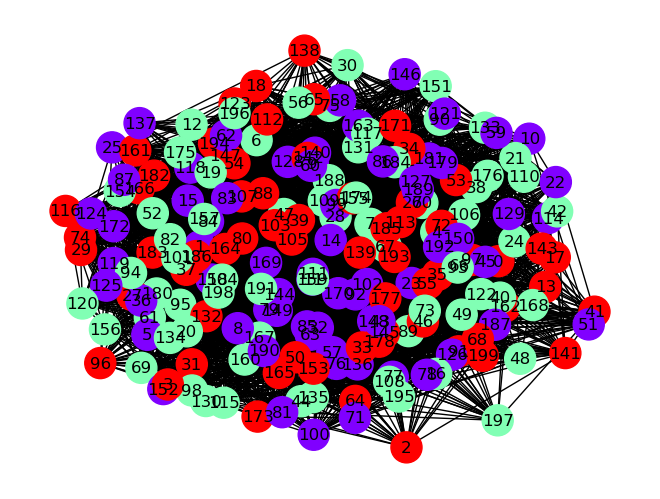

In [75]:
print("=== PRIMER 6 — Greedy (basic) ===")
start_time = time.time()
labels_basic, best_val_basic = greedy_max_k_cut_basic(G6, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_basic)
print("Podela čvorova:", labels_basic)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G6, labels_basic)

print("\n=== PRIMER 6 — Greedy (sorted) ===")
start_time = time.time()
labels_sorted, best_val_sorted = greedy_max_k_cut_sorted(G6, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_sorted)
print("Podela čvorova:", labels_sorted)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G6, labels_sorted)

In [76]:
n = 250
filename = f"testiranje/graph_{n}.edgelist"
G7 = nx.read_weighted_edgelist(filename, nodetype=int)

=== PRIMER 7 — Greedy (basic) ===
Najbolja vrednost preseka: 25753.0
Podela čvorova: {0: 0, 4: 1, 5: 1, 7: 1, 16: 1, 19: 2, 51: 1, 58: 2, 59: 1, 60: 2, 64: 1, 65: 2, 67: 0, 70: 1, 75: 2, 77: 2, 83: 2, 85: 0, 89: 2, 94: 2, 95: 1, 110: 0, 111: 2, 116: 0, 119: 2, 121: 1, 125: 1, 126: 1, 132: 2, 134: 2, 138: 1, 141: 1, 146: 2, 149: 1, 150: 1, 158: 0, 159: 0, 167: 1, 171: 0, 178: 0, 181: 1, 183: 0, 185: 2, 186: 1, 190: 0, 191: 2, 192: 0, 195: 0, 199: 2, 214: 2, 218: 1, 221: 2, 235: 0, 238: 2, 240: 2, 243: 0, 248: 1, 1: 0, 10: 2, 12: 1, 13: 1, 31: 1, 34: 1, 40: 1, 48: 2, 52: 0, 57: 0, 61: 0, 68: 0, 71: 0, 72: 1, 84: 0, 87: 2, 97: 0, 107: 1, 108: 2, 118: 0, 122: 1, 133: 2, 142: 2, 148: 0, 153: 0, 164: 1, 173: 0, 180: 2, 188: 2, 194: 2, 201: 0, 202: 1, 206: 1, 220: 2, 228: 0, 241: 0, 249: 2, 2: 0, 22: 1, 25: 1, 37: 2, 39: 0, 43: 2, 44: 2, 45: 0, 54: 1, 63: 2, 66: 1, 74: 1, 76: 2, 80: 1, 88: 0, 93: 1, 101: 2, 112: 2, 113: 2, 114: 2, 127: 0, 128: 2, 145: 0, 152: 0, 155: 2, 163: 2, 176: 0, 177: 1

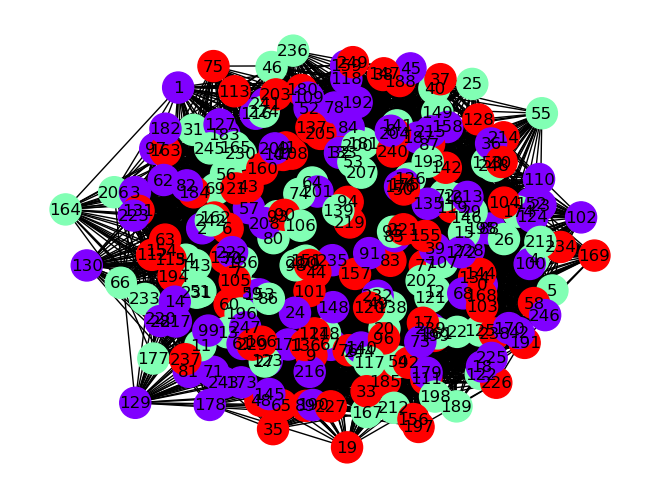


=== PRIMER 7— Greedy (sorted) ===
Najbolja vrednost preseka: 25951.0
Podela čvorova: {235: 0, 139: 1, 107: 0, 61: 0, 195: 0, 218: 1, 153: 0, 145: 2, 208: 2, 141: 2, 241: 2, 24: 1, 69: 1, 151: 0, 98: 2, 21: 1, 32: 0, 79: 1, 85: 2, 121: 0, 132: 1, 244: 0, 222: 2, 67: 1, 94: 2, 138: 1, 133: 0, 220: 0, 176: 1, 175: 2, 140: 2, 144: 2, 120: 1, 0: 2, 83: 1, 95: 2, 185: 0, 221: 0, 34: 2, 2: 1, 39: 0, 43: 0, 56: 1, 117: 2, 119: 1, 186: 1, 202: 1, 76: 2, 103: 1, 157: 2, 193: 2, 15: 1, 18: 1, 96: 0, 136: 0, 77: 0, 190: 1, 199: 0, 201: 2, 99: 0, 205: 1, 187: 0, 91: 2, 16: 1, 183: 0, 13: 2, 52: 2, 68: 2, 194: 0, 228: 2, 74: 2, 3: 2, 219: 0, 92: 0, 227: 1, 6: 2, 161: 2, 143: 0, 26: 1, 242: 0, 4: 1, 134: 1, 71: 2, 72: 0, 84: 1, 108: 1, 62: 0, 184: 2, 104: 0, 223: 2, 27: 0, 210: 2, 216: 0, 53: 0, 203: 1, 17: 1, 116: 0, 146: 2, 192: 1, 173: 2, 44: 1, 88: 2, 123: 2, 131: 1, 41: 1, 209: 0, 106: 1, 213: 2, 149: 1, 181: 1, 10: 2, 57: 1, 112: 2, 127: 1, 11: 1, 86: 1, 42: 0, 174: 0, 109: 0, 100: 0, 137: 0, 

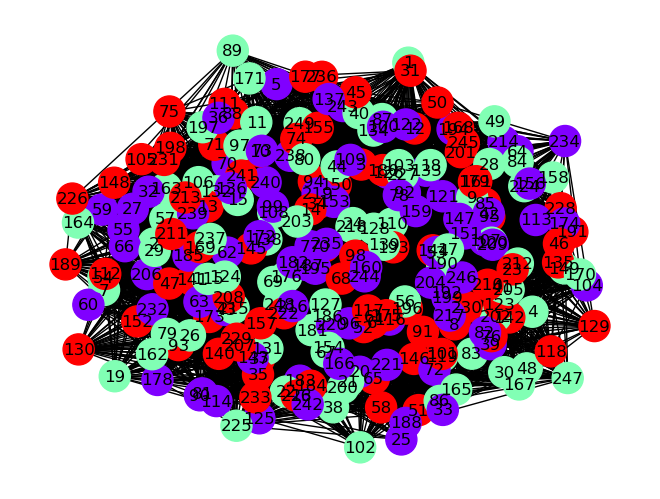

In [77]:
print("=== PRIMER 7 — Greedy (basic) ===")
start_time = time.time()
labels_basic, best_val_basic = greedy_max_k_cut_basic(G7, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_basic)
print("Podela čvorova:", labels_basic)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G7, labels_basic)

print("\n=== PRIMER 7— Greedy (sorted) ===")
start_time = time.time()
labels_sorted, best_val_sorted = greedy_max_k_cut_sorted(G7, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_sorted)
print("Podela čvorova:", labels_sorted)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G7, labels_sorted)

In [60]:
n = 350  
filename = f"testiranje/graph_{n}.edgelist"
G8 = nx.read_weighted_edgelist(filename, nodetype=int)

=== PRIMER 8 — Greedy (basic) ===
Najbolja vrednost preseka: 50169.0
Podela čvorova: {0: 0, 8: 1, 27: 1, 35: 2, 36: 1, 39: 0, 44: 2, 53: 2, 56: 1, 64: 1, 65: 1, 73: 2, 76: 1, 84: 1, 86: 1, 87: 0, 91: 2, 94: 0, 95: 0, 97: 2, 105: 1, 107: 2, 112: 2, 114: 1, 116: 1, 125: 2, 127: 1, 130: 2, 139: 2, 142: 2, 149: 2, 150: 0, 165: 0, 186: 2, 194: 0, 203: 0, 209: 2, 218: 0, 222: 0, 223: 1, 224: 1, 239: 0, 244: 2, 245: 1, 248: 2, 250: 0, 258: 0, 259: 0, 273: 2, 279: 1, 282: 1, 290: 0, 291: 0, 292: 2, 297: 1, 306: 0, 308: 1, 310: 2, 312: 1, 322: 2, 323: 2, 333: 2, 344: 1, 348: 2, 1: 0, 18: 0, 20: 2, 24: 2, 38: 2, 50: 1, 52: 1, 75: 0, 79: 0, 80: 1, 83: 2, 85: 0, 110: 0, 113: 2, 124: 0, 135: 1, 137: 2, 143: 2, 153: 0, 154: 0, 160: 2, 162: 2, 169: 2, 171: 2, 175: 0, 176: 0, 183: 0, 185: 1, 187: 1, 188: 2, 191: 0, 196: 2, 199: 0, 202: 1, 204: 0, 213: 1, 220: 1, 221: 2, 227: 2, 232: 2, 241: 1, 242: 1, 247: 0, 249: 2, 260: 1, 265: 0, 268: 1, 272: 1, 274: 2, 276: 1, 277: 1, 280: 1, 285: 0, 303: 1, 304: 

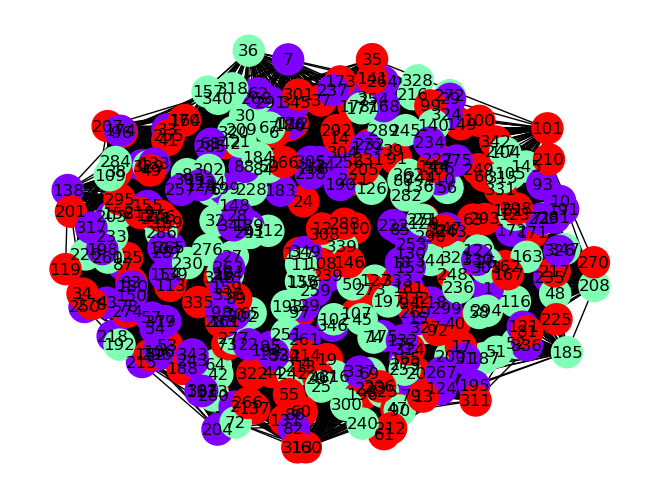


=== PRIMER 8— Greedy (sorted) ===
Najbolja vrednost preseka: 50012.0
Podela čvorova: {156: 0, 11: 0, 169: 0, 108: 1, 64: 2, 222: 1, 129: 2, 45: 1, 76: 0, 94: 0, 85: 1, 241: 0, 288: 0, 87: 1, 306: 2, 221: 2, 259: 0, 135: 1, 4: 1, 236: 1, 334: 1, 112: 0, 273: 1, 308: 0, 310: 0, 80: 0, 242: 2, 190: 2, 235: 2, 77: 2, 133: 2, 271: 2, 198: 2, 251: 0, 14: 2, 142: 1, 153: 1, 9: 1, 231: 0, 148: 1, 102: 0, 184: 0, 333: 1, 50: 0, 70: 2, 23: 2, 167: 1, 302: 0, 343: 2, 107: 0, 312: 1, 24: 1, 327: 2, 117: 2, 256: 2, 12: 1, 214: 0, 27: 0, 224: 2, 176: 0, 339: 1, 26: 0, 181: 2, 189: 1, 289: 0, 349: 2, 254: 2, 89: 2, 8: 1, 130: 2, 186: 2, 209: 0, 290: 1, 1: 2, 171: 2, 175: 1, 188: 0, 213: 0, 59: 0, 159: 2, 253: 1, 32: 2, 243: 2, 346: 1, 182: 0, 22: 0, 37: 0, 179: 1, 223: 0, 244: 2, 248: 0, 291: 2, 232: 2, 276: 1, 304: 1, 120: 2, 136: 2, 262: 0, 293: 2, 92: 1, 118: 0, 299: 1, 296: 0, 341: 0, 103: 1, 60: 2, 234: 2, 39: 1, 114: 1, 127: 1, 20: 0, 183: 1, 227: 1, 268: 0, 161: 2, 197: 0, 46: 1, 28: 1, 314: 

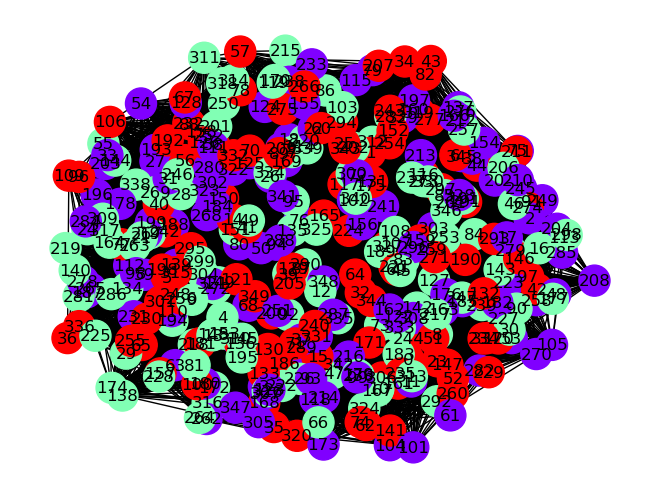

In [61]:
print("=== PRIMER 8 — Greedy (basic) ===")
start_time = time.time()
labels_basic, best_val_basic = greedy_max_k_cut_basic(G8, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_basic)
print("Podela čvorova:", labels_basic)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G8, labels_basic)

print("\n=== PRIMER 8— Greedy (sorted) ===")
start_time = time.time()
labels_sorted, best_val_sorted = greedy_max_k_cut_sorted(G8, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_sorted)
print("Podela čvorova:", labels_sorted)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G8, labels_sorted)

In [62]:
n = 450  
filename = f"testiranje/graph_{n}.edgelist"
G9 = nx.read_weighted_edgelist(filename, nodetype=int)

=== PRIMER 9 — Greedy (basic) ===
Najbolja vrednost preseka: 82129.0
Podela čvorova: {0: 0, 1: 1, 4: 1, 13: 2, 18: 2, 20: 1, 26: 2, 28: 1, 29: 1, 36: 2, 44: 0, 57: 2, 58: 2, 61: 0, 68: 2, 75: 1, 76: 1, 83: 0, 103: 2, 104: 1, 114: 0, 118: 0, 121: 1, 139: 1, 143: 1, 148: 2, 154: 2, 156: 0, 158: 1, 168: 0, 171: 2, 191: 2, 193: 2, 204: 0, 206: 0, 207: 0, 210: 2, 212: 2, 214: 2, 218: 1, 221: 0, 239: 2, 240: 2, 261: 1, 265: 1, 269: 1, 276: 1, 282: 1, 283: 0, 284: 1, 295: 1, 304: 1, 311: 1, 315: 2, 318: 0, 320: 2, 329: 0, 331: 0, 335: 2, 339: 1, 356: 1, 357: 1, 358: 0, 368: 0, 370: 2, 373: 1, 384: 2, 385: 2, 389: 1, 391: 1, 393: 1, 394: 0, 401: 2, 403: 0, 405: 0, 406: 0, 407: 2, 408: 1, 410: 0, 416: 2, 424: 1, 427: 0, 437: 0, 439: 0, 2: 0, 5: 0, 19: 0, 27: 2, 32: 0, 38: 1, 39: 2, 41: 0, 51: 1, 74: 2, 78: 0, 80: 0, 82: 2, 85: 2, 91: 0, 93: 0, 100: 1, 105: 2, 119: 2, 124: 0, 125: 0, 138: 0, 140: 0, 150: 1, 160: 0, 162: 0, 165: 2, 169: 2, 173: 1, 196: 2, 208: 2, 209: 1, 213: 2, 216: 2, 222: 2, 2

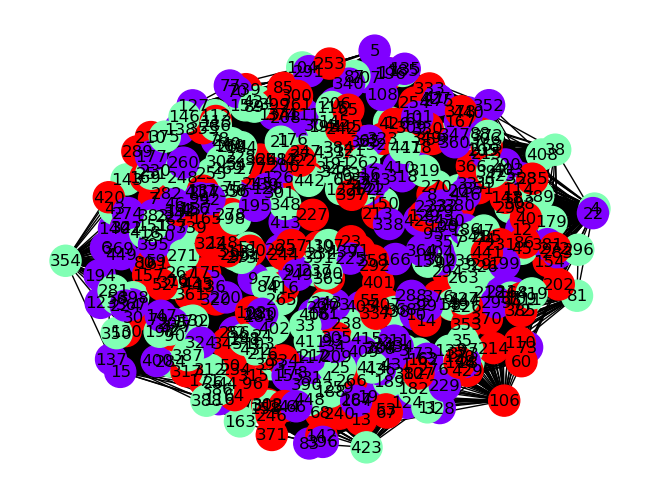


=== PRIMER 9— Greedy (sorted) ===
Najbolja vrednost preseka: 81992.0
Podela čvorova: {273: 0, 149: 0, 128: 1, 397: 1, 237: 2, 257: 0, 193: 0, 126: 0, 184: 1, 363: 2, 362: 1, 307: 0, 175: 2, 244: 1, 391: 1, 32: 1, 82: 2, 405: 1, 417: 1, 133: 0, 271: 2, 416: 1, 125: 0, 270: 2, 336: 0, 345: 2, 376: 0, 433: 2, 413: 1, 195: 2, 131: 0, 406: 2, 70: 2, 232: 1, 92: 1, 407: 0, 27: 0, 119: 2, 8: 2, 245: 1, 343: 0, 147: 2, 304: 1, 335: 0, 213: 1, 108: 2, 430: 1, 117: 0, 329: 1, 339: 0, 384: 0, 401: 2, 150: 1, 294: 1, 122: 2, 157: 2, 166: 1, 258: 2, 172: 2, 241: 0, 331: 2, 292: 2, 233: 1, 374: 0, 217: 2, 351: 1, 415: 2, 161: 0, 247: 2, 414: 2, 28: 0, 76: 2, 91: 0, 105: 2, 216: 2, 256: 1, 314: 1, 425: 0, 59: 0, 263: 2, 431: 1, 198: 2, 298: 1, 264: 0, 300: 2, 204: 1, 282: 2, 357: 1, 439: 1, 140: 2, 209: 1, 347: 0, 43: 0, 49: 1, 365: 0, 54: 1, 116: 1, 227: 2, 225: 1, 143: 0, 148: 0, 212: 0, 318: 0, 80: 2, 293: 1, 432: 0, 9: 2, 30: 1, 200: 1, 367: 2, 180: 1, 215: 1, 136: 0, 155: 0, 75: 0, 284: 0, 315:

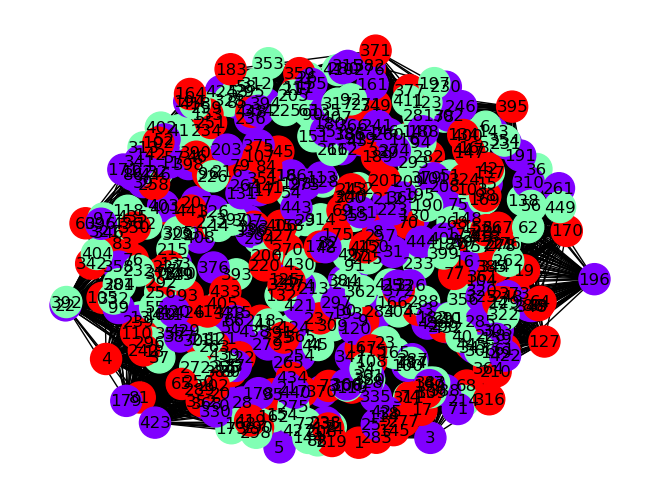

In [63]:
print("=== PRIMER 9 — Greedy (basic) ===")
start_time = time.time()
labels_basic, best_val_basic = greedy_max_k_cut_basic(G9, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_basic)
print("Podela čvorova:", labels_basic)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G9, labels_basic)

print("\n=== PRIMER 9— Greedy (sorted) ===")
start_time = time.time()
labels_sorted, best_val_sorted = greedy_max_k_cut_sorted(G9, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_sorted)
print("Podela čvorova:", labels_sorted)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G9, labels_sorted)

In [65]:

n =550  
filename = f"testiranje/graph_{n}.edgelist"
G10=nx.read_weighted_edgelist(filename, nodetype=int)

=== PRIMER 10 — Greedy (basic) ===
Najbolja vrednost preseka: 121488.0
Podela čvorova: {0: 0, 4: 1, 8: 1, 9: 1, 10: 1, 13: 2, 18: 2, 26: 1, 28: 2, 35: 2, 36: 2, 47: 2, 48: 1, 50: 0, 53: 0, 59: 0, 62: 2, 65: 2, 71: 0, 76: 0, 86: 1, 87: 2, 88: 2, 93: 0, 95: 1, 96: 1, 101: 0, 105: 2, 109: 2, 119: 1, 122: 1, 136: 0, 143: 0, 149: 1, 150: 0, 161: 2, 168: 1, 176: 2, 177: 0, 178: 1, 179: 2, 185: 2, 189: 0, 191: 1, 204: 2, 205: 1, 214: 1, 216: 0, 217: 2, 222: 1, 225: 2, 231: 1, 239: 2, 240: 1, 241: 0, 244: 2, 245: 0, 248: 1, 262: 2, 265: 2, 272: 2, 276: 0, 283: 0, 290: 0, 294: 1, 296: 2, 299: 1, 300: 1, 325: 1, 326: 0, 328: 1, 330: 1, 342: 1, 344: 0, 348: 2, 350: 0, 351: 1, 354: 0, 365: 0, 368: 0, 371: 2, 378: 0, 392: 1, 397: 1, 400: 1, 403: 2, 408: 2, 415: 1, 416: 0, 418: 0, 421: 2, 425: 0, 430: 2, 432: 2, 445: 2, 450: 1, 451: 1, 452: 1, 453: 0, 459: 1, 463: 1, 464: 0, 477: 2, 479: 1, 485: 0, 490: 1, 493: 1, 495: 1, 498: 0, 505: 2, 508: 0, 510: 0, 514: 2, 515: 2, 519: 1, 529: 2, 532: 2, 538: 1

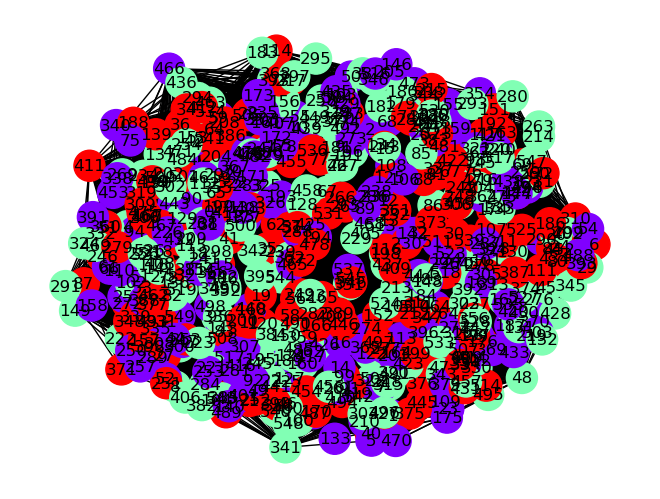


=== PRIMER 10— Greedy (sorted) ===
Najbolja vrednost preseka: 121779.0
Podela čvorova: {93: 0, 249: 0, 193: 1, 513: 1, 57: 1, 13: 2, 128: 0, 288: 0, 216: 2, 465: 0, 99: 1, 427: 0, 82: 2, 255: 1, 444: 1, 153: 1, 468: 2, 478: 0, 86: 1, 177: 0, 262: 0, 500: 1, 171: 0, 542: 1, 497: 2, 160: 1, 535: 0, 89: 2, 71: 0, 239: 2, 265: 2, 536: 1, 3: 2, 79: 2, 417: 1, 399: 1, 76: 0, 67: 0, 423: 1, 116: 0, 148: 2, 228: 1, 342: 0, 403: 2, 301: 2, 395: 0, 531: 2, 312: 1, 389: 0, 74: 2, 496: 1, 212: 0, 241: 1, 365: 0, 532: 2, 544: 0, 39: 2, 424: 2, 129: 0, 511: 2, 541: 1, 396: 1, 190: 1, 56: 1, 242: 1, 141: 2, 0: 1, 549: 2, 115: 0, 194: 1, 384: 0, 458: 0, 199: 0, 231: 2, 328: 1, 400: 2, 510: 1, 49: 2, 506: 0, 413: 2, 229: 1, 334: 2, 253: 0, 206: 2, 140: 1, 92: 1, 138: 0, 189: 1, 348: 2, 519: 0, 270: 0, 337: 1, 502: 1, 2: 1, 41: 0, 108: 2, 394: 0, 546: 2, 331: 0, 166: 2, 286: 0, 455: 0, 201: 2, 237: 1, 47: 0, 101: 0, 354: 2, 408: 2, 450: 0, 247: 2, 277: 1, 282: 2, 285: 0, 405: 2, 545: 2, 43: 0, 473: 0, 

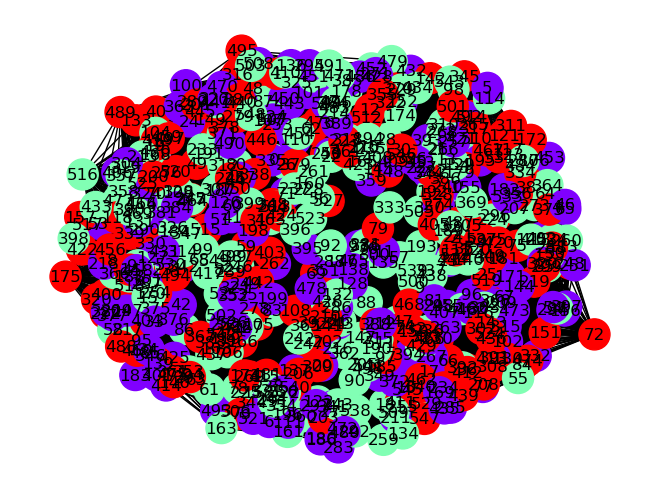

In [66]:
print("=== PRIMER 10 — Greedy (basic) ===")
start_time = time.time()
labels_basic, best_val_basic = greedy_max_k_cut_basic(G10, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_basic)
print("Podela čvorova:", labels_basic)
print("Vreme:", format_time(end_time - start_time), "sekundi")


plot_graph(G10, labels_basic)

print("\n=== PRIMER 10— Greedy (sorted) ===")
start_time = time.time()
labels_sorted, best_val_sorted = greedy_max_k_cut_sorted(G10, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_sorted)
print("Podela čvorova:", labels_sorted)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G10, labels_sorted)

In [67]:
n =1000  
filename = f"testiranje/graph_{n}.edgelist"
G11 = nx.read_weighted_edgelist(filename, nodetype=int)

=== PRIMER 11 — Greedy (basic) ===
Najbolja vrednost preseka: 393374.0
Podela čvorova: {0: 0, 3: 1, 8: 2, 16: 1, 23: 2, 29: 1, 31: 1, 32: 1, 33: 1, 35: 2, 40: 1, 54: 0, 55: 2, 57: 0, 83: 1, 91: 2, 96: 2, 97: 1, 103: 0, 107: 0, 114: 0, 123: 1, 125: 2, 131: 2, 142: 2, 146: 2, 149: 0, 155: 2, 158: 0, 164: 2, 172: 1, 176: 1, 181: 2, 195: 0, 208: 0, 214: 2, 217: 1, 226: 1, 230: 2, 235: 0, 247: 1, 251: 2, 254: 2, 257: 0, 263: 1, 268: 1, 271: 0, 286: 1, 287: 1, 297: 2, 298: 0, 326: 0, 336: 2, 338: 1, 344: 0, 348: 0, 349: 1, 353: 1, 354: 1, 357: 2, 359: 1, 363: 2, 366: 0, 368: 2, 370: 0, 372: 2, 379: 0, 381: 0, 387: 0, 390: 2, 393: 1, 396: 1, 404: 1, 405: 0, 411: 2, 417: 1, 423: 0, 424: 1, 426: 2, 428: 1, 432: 2, 433: 2, 441: 0, 442: 1, 450: 0, 451: 1, 463: 0, 468: 0, 477: 1, 478: 0, 480: 2, 487: 1, 495: 1, 505: 2, 509: 2, 512: 0, 513: 2, 527: 1, 530: 0, 537: 0, 547: 0, 548: 0, 549: 2, 551: 0, 560: 2, 572: 2, 576: 0, 581: 1, 586: 2, 587: 2, 600: 0, 603: 0, 607: 2, 614: 2, 620: 2, 629: 2, 633: 

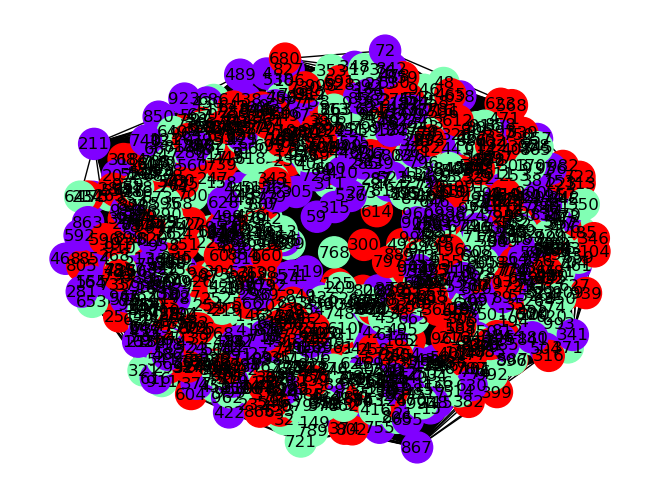


=== PRIMER 11— Greedy (sorted) ===
Najbolja vrednost preseka: 393703.0
Podela čvorova: {391: 0, 870: 1, 849: 0, 986: 0, 276: 0, 300: 1, 91: 0, 491: 1, 236: 2, 291: 2, 748: 1, 472: 0, 557: 2, 249: 2, 222: 1, 275: 1, 536: 1, 852: 0, 897: 2, 904: 1, 884: 0, 151: 2, 415: 0, 839: 1, 702: 2, 19: 1, 219: 2, 425: 2, 2: 2, 223: 1, 377: 2, 147: 0, 176: 2, 681: 0, 59: 0, 320: 2, 161: 1, 202: 0, 575: 2, 394: 1, 3: 2, 408: 1, 660: 1, 613: 0, 848: 1, 130: 2, 618: 0, 13: 0, 16: 2, 405: 0, 880: 0, 110: 1, 961: 1, 128: 2, 138: 0, 209: 1, 233: 2, 252: 2, 269: 2, 264: 0, 237: 1, 523: 0, 873: 1, 665: 2, 431: 2, 628: 2, 92: 1, 273: 2, 898: 0, 70: 0, 772: 2, 779: 1, 885: 0, 970: 1, 61: 0, 131: 2, 354: 0, 477: 1, 943: 2, 305: 1, 497: 0, 862: 2, 212: 0, 637: 2, 694: 0, 47: 0, 459: 1, 860: 2, 116: 1, 757: 1, 171: 1, 308: 1, 326: 1, 823: 1, 991: 0, 7: 1, 12: 0, 311: 2, 334: 2, 162: 1, 744: 1, 917: 0, 978: 2, 95: 2, 290: 2, 51: 0, 566: 0, 135: 0, 107: 0, 155: 2, 633: 1, 691: 1, 980: 1, 157: 1, 333: 0, 584: 2, 8

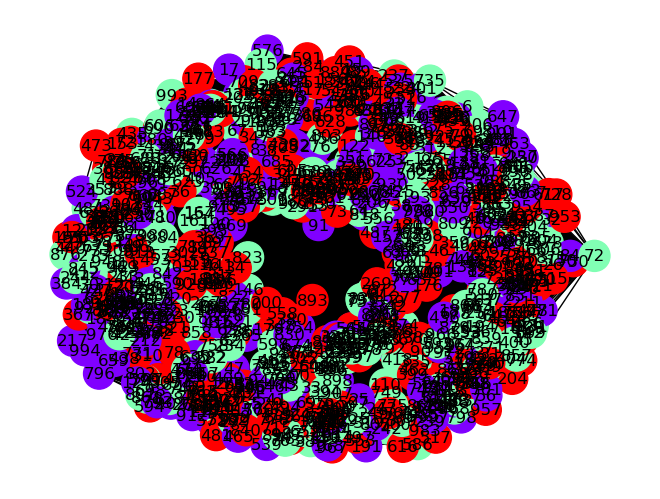

In [68]:
print("=== PRIMER 11 — Greedy (basic) ===")
start_time = time.time()
labels_basic, best_val_basic = greedy_max_k_cut_basic(G11, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_basic)
print("Podela čvorova:", labels_basic)
print("Vreme:", format_time(end_time - start_time), "sekundi")


plot_graph(G11, labels_basic)

print("\n=== PRIMER 11— Greedy (sorted) ===")
start_time = time.time()
labels_sorted, best_val_sorted = greedy_max_k_cut_sorted(G11, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_sorted)
print("Podela čvorova:", labels_sorted)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G11, labels_sorted)

In [69]:
n =3000
filename = f"testiranje/graph_{n}.edgelist"
G12 = nx.read_weighted_edgelist(filename, nodetype=int)

=== PRIMER 12 — Greedy (basic) ===
Najbolja vrednost preseka: 3440337.0
Podela čvorova: {0: 0, 5: 1, 29: 1, 30: 1, 33: 2, 36: 2, 47: 0, 50: 1, 54: 1, 66: 1, 67: 1, 72: 2, 74: 1, 75: 2, 78: 2, 82: 1, 89: 0, 93: 1, 96: 0, 98: 1, 102: 1, 103: 2, 107: 2, 113: 2, 121: 1, 127: 0, 129: 0, 137: 2, 148: 2, 156: 1, 157: 2, 166: 1, 176: 1, 177: 2, 187: 2, 190: 1, 191: 2, 196: 0, 202: 1, 205: 0, 215: 2, 216: 2, 224: 0, 228: 1, 229: 0, 231: 1, 235: 0, 237: 0, 246: 0, 264: 2, 265: 0, 268: 2, 269: 0, 282: 2, 290: 1, 292: 0, 294: 0, 304: 1, 317: 2, 319: 1, 326: 0, 327: 0, 336: 0, 341: 1, 349: 0, 355: 2, 362: 0, 363: 2, 365: 1, 369: 0, 372: 1, 375: 1, 380: 0, 386: 2, 399: 0, 412: 2, 416: 1, 419: 2, 424: 2, 426: 2, 431: 1, 435: 1, 438: 2, 440: 2, 443: 0, 465: 1, 466: 0, 479: 2, 480: 0, 481: 1, 493: 0, 499: 0, 500: 1, 503: 1, 506: 2, 520: 0, 525: 1, 527: 0, 544: 1, 549: 1, 550: 2, 553: 2, 555: 2, 559: 1, 565: 0, 567: 1, 574: 1, 576: 1, 591: 1, 594: 2, 596: 2, 597: 2, 601: 1, 603: 2, 604: 0, 607: 0, 613: 

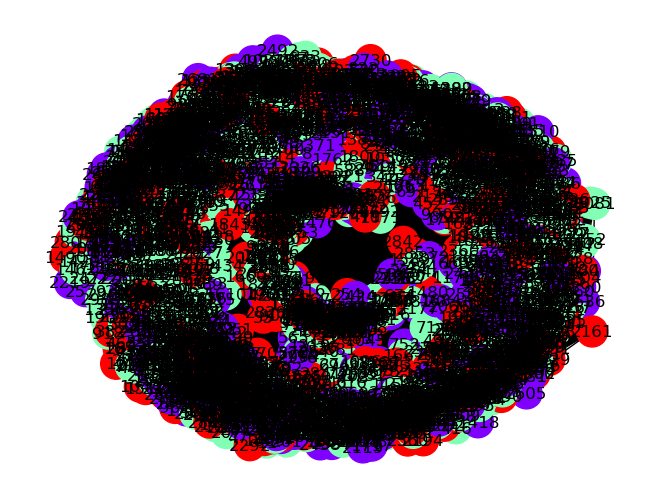


=== PRIMER 12— Greedy (sorted) ===
Najbolja vrednost preseka: 3438610.0
Podela čvorova: {1279: 0, 1641: 0, 158: 0, 2622: 1, 2150: 0, 2222: 0, 1932: 1, 1447: 1, 675: 1, 1774: 0, 2360: 2, 97: 2, 1834: 1, 21: 2, 1362: 1, 1716: 2, 1516: 1, 1532: 2, 1274: 0, 337: 2, 586: 1, 759: 1, 2855: 1, 2101: 0, 691: 1, 731: 2, 1830: 0, 226: 2, 397: 2, 1730: 1, 2263: 0, 873: 1, 2646: 0, 2635: 0, 2421: 2, 2703: 0, 2251: 2, 2999: 2, 871: 1, 2835: 0, 371: 1, 2364: 2, 2682: 2, 2041: 2, 2888: 0, 1184: 2, 2617: 2, 2711: 1, 2477: 0, 1376: 1, 2225: 2, 575: 1, 2785: 0, 2662: 1, 1205: 1, 883: 0, 2486: 0, 990: 1, 2921: 1, 223: 1, 2045: 2, 2427: 2, 721: 0, 500: 1, 160: 0, 2233: 1, 578: 1, 2105: 2, 1969: 2, 2011: 0, 454: 2, 2145: 2, 156: 2, 574: 2, 84: 2, 1143: 2, 1299: 0, 2569: 1, 598: 1, 208: 1, 782: 0, 2056: 0, 2107: 1, 2481: 1, 1886: 2, 2000: 0, 2380: 2, 774: 0, 1223: 1, 2842: 1, 2382: 2, 2502: 2, 2713: 1, 2154: 2, 2548: 0, 824: 2, 2841: 0, 1249: 2, 912: 1, 1318: 0, 1530: 0, 2436: 2, 1428: 2, 304: 2, 520: 1, 15

In [ ]:
print("=== PRIMER 12 — Greedy (basic) ===")
start_time = time.time()
labels_basic, best_val_basic = greedy_max_k_cut_basic(G12, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_basic)
print("Podela čvorova:", labels_basic)
print("Vreme:", format_time(end_time - start_time), "sekundi")


plot_graph(G12, labels_basic)

print("\n=== PRIMER 12— Greedy (sorted) ===")
start_time = time.time()
labels_sorted, best_val_sorted = greedy_max_k_cut_sorted(G12, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_sorted)
print("Podela čvorova:", labels_sorted)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G12, labels_sorted)

In [41]:
G13= nx.gnp_random_graph(5000, 0.2, seed=42) 
random.seed(5000)
for u, v in G13.edges():
    G13[u][v]['weight'] = random.randint(1, 10)

=== PRIMER 13 — Greedy (basic) ===
Najbolja vrednost preseka: 9460554
Podela čvorova: {0: 0, 1: 0, 2: 1, 3: 1, 4: 0, 5: 0, 6: 0, 7: 1, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 1, 14: 1, 15: 1, 16: 0, 17: 2, 18: 0, 19: 0, 20: 2, 21: 1, 22: 2, 23: 0, 24: 1, 25: 2, 26: 2, 27: 0, 28: 1, 29: 0, 30: 2, 31: 0, 32: 1, 33: 2, 34: 1, 35: 1, 36: 2, 37: 0, 38: 0, 39: 0, 40: 2, 41: 0, 42: 0, 43: 1, 44: 1, 45: 1, 46: 0, 47: 1, 48: 1, 49: 1, 50: 0, 51: 2, 52: 1, 53: 1, 54: 2, 55: 1, 56: 0, 57: 1, 58: 2, 59: 1, 60: 0, 61: 2, 62: 0, 63: 2, 64: 0, 65: 1, 66: 2, 67: 2, 68: 1, 69: 0, 70: 2, 71: 1, 72: 1, 73: 2, 74: 1, 75: 1, 76: 1, 77: 1, 78: 2, 79: 0, 80: 0, 81: 1, 82: 2, 83: 0, 84: 0, 85: 1, 86: 2, 87: 0, 88: 1, 89: 2, 90: 2, 91: 1, 92: 0, 93: 2, 94: 0, 95: 2, 96: 0, 97: 1, 98: 0, 99: 2, 100: 2, 101: 2, 102: 1, 103: 2, 104: 0, 105: 2, 106: 0, 107: 0, 108: 0, 109: 2, 110: 2, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 1, 117: 1, 118: 2, 119: 0, 120: 2, 121: 0, 122: 0, 123: 1, 124: 2, 125: 2, 126: 0, 127: 2,

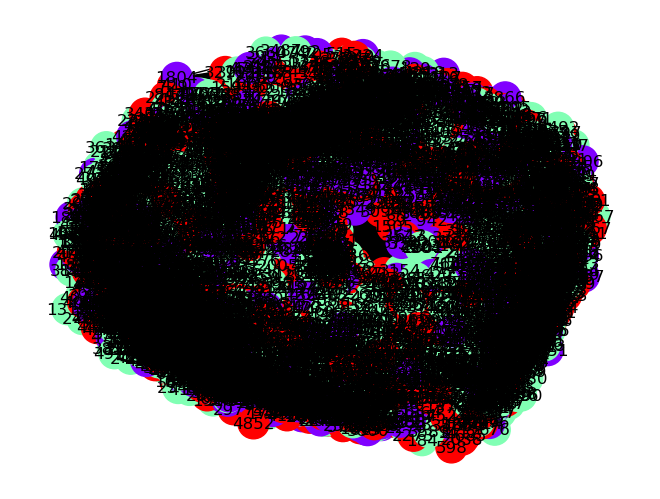


=== PRIMER 13— Greedy (sorted) ===
Najbolja vrednost preseka: 9459177
Podela čvorova: {4227: 0, 3233: 0, 1309: 1, 385: 0, 1720: 1, 2709: 0, 3750: 2, 4705: 1, 2686: 2, 3329: 1, 766: 0, 3588: 0, 951: 0, 2259: 0, 3718: 0, 372: 2, 1981: 2, 2070: 2, 4277: 1, 3810: 2, 4672: 1, 1612: 0, 3168: 1, 955: 0, 3071: 2, 4769: 1, 858: 2, 4499: 1, 386: 2, 1388: 1, 4936: 1, 4997: 1, 3457: 1, 3666: 0, 3686: 1, 776: 0, 3036: 0, 3672: 1, 4563: 2, 1396: 2, 2204: 1, 4134: 2, 103: 0, 851: 2, 1586: 0, 2909: 0, 3087: 1, 3421: 2, 489: 2, 564: 2, 747: 2, 1733: 2, 3402: 0, 3405: 2, 3773: 1, 3909: 1, 4228: 2, 4250: 1, 557: 2, 1130: 2, 1217: 1, 3623: 0, 138: 0, 1456: 2, 2230: 2, 4695: 1, 1168: 1, 1233: 1, 1322: 0, 1881: 1, 2148: 0, 3248: 0, 3460: 1, 4799: 0, 2778: 2, 2785: 0, 2882: 1, 3302: 0, 4099: 0, 4536: 0, 712: 1, 768: 1, 773: 1, 921: 2, 1674: 0, 3154: 2, 853: 0, 1633: 2, 3883: 1, 824: 1, 2320: 0, 3543: 1, 4050: 2, 1358: 2, 2385: 0, 2436: 2, 2857: 2, 2887: 2, 3244: 0, 3552: 1, 4148: 0, 4271: 1, 280: 0, 1025: 1

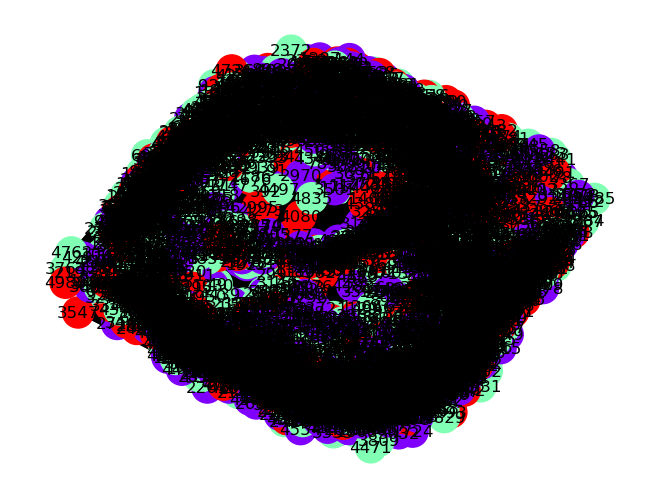

In [42]:
print("=== PRIMER 13 — Greedy (basic) ===")
start_time = time.time()
labels_basic, best_val_basic = greedy_max_k_cut_basic(G13, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_basic)
print("Podela čvorova:", labels_basic)
print("Vreme:", format_time(end_time - start_time), "sekundi")


plot_graph(G13, labels_basic)

print("\n=== PRIMER 13— Greedy (sorted) ===")
start_time = time.time()
labels_sorted, best_val_sorted = greedy_max_k_cut_sorted(G13, k)
end_time = time.time()
print("Najbolja vrednost preseka:", best_val_sorted)
print("Podela čvorova:", labels_sorted)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G13, labels_sorted)

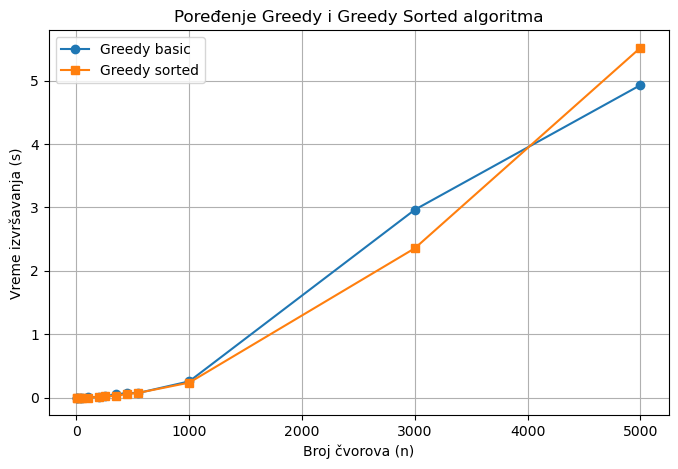

In [78]:
n_values = [4,7,30,50,100,200,250,350,450,550,1000,3000,5000]
times = [0.0003,0.0003,0.0008,0.0014,0.0066,0.0152,0.0244,0.0521,0.0733,0.0758,0.2577,2.9644,4.9291]  
timessorted=[0.0002,0.0002,0.0006,0.0009,0.0024,0.0135,0.0263,0.0288,0.0606,0.0771,0.2379,2.3567,5.5181]

import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))
plt.plot(n_values,times, marker='o', label='Greedy basic')
plt.plot(n_values,timessorted, marker='s', label='Greedy sorted')

plt.xlabel("Broj čvorova (n)")
plt.ylabel("Vreme izvršavanja (s)")
plt.title("Poređenje Greedy i Greedy Sorted algoritma")
plt.legend()
plt.grid(True)
plt.show()

In [79]:
df = pd.DataFrame({
    "Broj čvorova (n)": n_values,
    "Vreme izvršavanja bez sortiranja(s)": times,
    "Vreme izvršavanja sa sortiranjem(s)": timessorted
})
df

Broj čvorova (n)  Vreme izvršavanja bez sortiranja(s)  \
0                  4                               0.0003   
1                  7                               0.0003   
2                 30                               0.0008   
3                 50                               0.0014   
4                100                               0.0066   
5                200                               0.0152   
6                250                               0.0244   
7                350                               0.0521   
8                450                               0.0733   
9                550                               0.0758   
10              1000                               0.2577   
11              3000                               2.9644   
12              5000                               4.9291   

    Vreme izvršavanja sa sortiranjem(s)  
0                                0.0002  
1                                0.0002  
2                                0.0006  
3                                0.0009  
4                                0.0024  
5                                0.0135  
6                                0.0263  
7                                0.0288  
8                                0.0606  
9                                0.0771  
10                               0.2379  
11                               2.3567  
12                               5.5181